In [2]:
from sklearn.datasets import load_svmlight_file
data, target = load_svmlight_file('data/E2006.train')

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression(n_jobs= -1)
lr.fit(data, target)
pred = lr.predict(data) 

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on training, {:.2}'.format(r2_score(target, pred)))

RMSE on training, 0.0024
R2 on training, 1.0


In [4]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits=5)
pred = cross_val_predict(lr, data, target, cv=kf)

print('RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

RMSE on testing (5 fold), 0.75
R2 on testing (5 fold), -0.43


In [5]:
from sklearn.linear_model import ElasticNet

# Edit the lines below if you want to switch method:                                                     
met = ElasticNet(alpha=0.1)
met.fit(data, target)
pred = met.predict(data)

print('[EN 0.1] RMSE on training: {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on training: {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on training: 0.4
[EN 0.1] R2 on training: 0.61


In [6]:
pred = cross_val_predict(met, data, target, cv=kf)

print('[EN 0.1] RMSE on testing (5 fold): {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on testing (5 fold): {:.2}'.format(r2_score(target, pred)))

[EN 0.1] RMSE on testing (5 fold): 0.4
[EN 0.1] R2 on testing (5 fold): 0.61


In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn import model_selection
# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1)

met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))

pred = cross_val_predict(met, data, target, cv= model_selection.KFold(n_splits = 5))
print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[EN CV] RMSE on training, 0.37
[EN CV] R2 on training, 0.65


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

[EN CV] RMSE on testing (5 fold), 0.37
[EN CV] R2 on testing (5 fold), 0.65


In [8]:
# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

pred = cross_val_predict(met, data, target, cv=kf)

print('[EN CV l1_ratio] RMSE on testing(5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV l1_ratio] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

[EN CV l1_ratio] RMSE on testing(5 fold), 0.37
[EN CV l1_ratio] R2 on testing (5 fold), 0.65


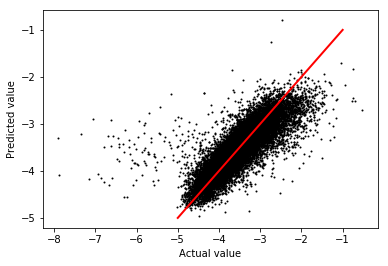

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(target, pred, c='k', s=1)
ax.plot([-5,-1], [-5,-1], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
fig.savefig('REGRESSION_FIG_05.png')